In [1]:
import pandas as pd
import numpy as np

# ----- 시각화 -----
import matplotlib.pyplot as plt

# ----- DL -----
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, BatchNormalization, LSTM, RepeatVector
from tensorflow.keras import regularizers

#----- time ----
import datetime
import time

#----- scaler-----
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## get data

In [3]:
df = pd.read_csv('./data/SPY.csv',index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


## parameter

In [4]:
test_sample = int(len(df)*0.2)
window_size = 10

<AxesSubplot:xlabel='Date'>

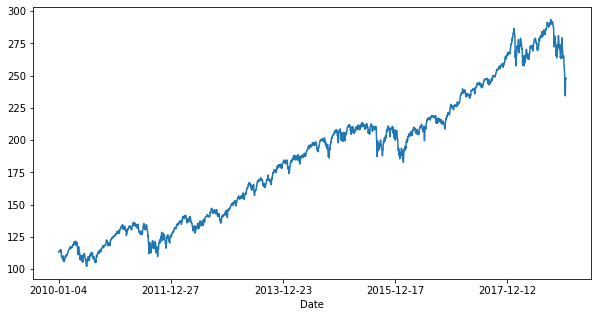

In [5]:
df.Close.plot(figsize=(10,5))

In [6]:
x_train = df.Close[:-test_sample]
x_test = df.Close[-test_sample:]

## scaling

In [7]:
scaler = MinMaxScaler()
scaler.fit(np.array(x_train).reshape(-1,1))
x_train_scaled = scaler.transform(np.array(x_train).reshape(-1,1))
x_test_scaled = scaler.transform(np.array(x_test).reshape(-1,1))

 ## make sequence

In [8]:
def make_sequence(x, window_size):
    X = []
    for i in range(len(x)-window_size):
        X.append([x[i+t] for t in range(window_size)])
    X = np.array(X)
    return X

In [9]:
seq_train = make_sequence(x_train_scaled,window_size)
seq_test = make_sequence(x_test_scaled,window_size)

## simple model

In [13]:
model = Sequential()
model.add(Dense(128, input_shape=(window_size,1), activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(128, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10, 128)           256       
                                                                 
 dense_1 (Dense)             (None, 10, 3)             387       
                                                                 
 dense_2 (Dense)             (None, 10, 128)           512       
                                                                 
Total params: 1,155
Trainable params: 1,155
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='mse',optimizer='adam')
his = model.fit(seq_train,seq_train,
               epochs=100,
               batch_size=512,
               shuffle=True,
               validation_data=(seq_test,seq_test))

Epoch 1/100
4/4 [==============================] - 1s 60ms/step - loss: 0.2910 - val_loss: 1.3605
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2860 - val_loss: 1.3452
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2808 - val_loss: 1.3287
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2753 - val_loss: 1.3107
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2694 - val_loss: 1.2911
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2633 - val_loss: 1.2698
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.2567 - val_loss: 1.2469
Epoch 8/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2498 - val_loss: 1.2222
Epoch 9/100
4/4 [==============================] - 0s 16ms/step - loss: 0.2426 - val_loss: 1.1956
Epoch 10/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2350 - val_loss: 1.1670
Epoch 11/100
4/4 [=

4/4 [==============================] - 0s 14ms/step - loss: 5.2505e-04 - val_loss: 0.0011
Epoch 84/100
4/4 [==============================] - 0s 14ms/step - loss: 5.1500e-04 - val_loss: 0.0010
Epoch 85/100
4/4 [==============================] - 0s 13ms/step - loss: 5.0606e-04 - val_loss: 9.7846e-04
Epoch 86/100
4/4 [==============================] - 0s 13ms/step - loss: 4.9802e-04 - val_loss: 9.3409e-04
Epoch 87/100
4/4 [==============================] - 0s 13ms/step - loss: 4.9068e-04 - val_loss: 8.9295e-04
Epoch 88/100
4/4 [==============================] - 0s 13ms/step - loss: 4.8370e-04 - val_loss: 8.5703e-04
Epoch 89/100
4/4 [==============================] - 0s 13ms/step - loss: 4.7718e-04 - val_loss: 8.2531e-04
Epoch 90/100
4/4 [==============================] - 0s 13ms/step - loss: 4.7107e-04 - val_loss: 7.9817e-04
Epoch 91/100
4/4 [==============================] - 0s 13ms/step - loss: 4.6518e-04 - val_loss: 7.7110e-04
Epoch 92/100
4/4 [==============================] - 0s 13m

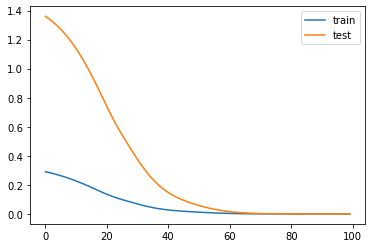

In [18]:
plt.plot(his.history['loss'],label='train')
plt.plot(his.history['val_loss'],label='test')
plt.legend()

In [22]:
decoded_stock = model.predict(seq_train)
decoded_stock.shape

(1801, 10, 128)

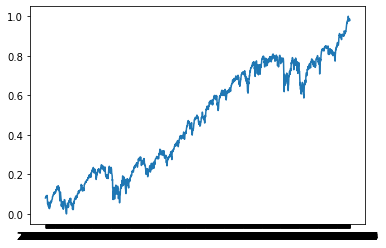

In [23]:
plt.plot(x_train.index.to_list(),x_train_scaled, label= 'x_train_scaled')
# plt.plot(x_train.index.to_list(), decoded_stock, label= 'x_train_decoded')

# 시도

In [47]:
len(x_train)

1811

In [48]:
x_train[:128]

Date
2010-01-04    113.330002
2010-01-05    113.629997
2010-01-06    113.709999
2010-01-07    114.190002
2010-01-08    114.570000
                 ...    
2010-06-30    103.220001
2010-07-01    102.760002
2010-07-02    102.199997
2010-07-06    102.870003
2010-07-07    106.110001
Name: Close, Length: 128, dtype: float64

In [49]:
model = Sequential()
model.add(Dense(128, input_shape=(1,1), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='linear'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1, 128)            256       
                                                                 
 dense_29 (Dense)            (None, 1, 64)             8256      
                                                                 
 dense_30 (Dense)            (None, 1, 3)              195       
                                                                 
 dense_31 (Dense)            (None, 1, 64)             256       
                                                                 
 dense_32 (Dense)            (None, 1, 128)            8320      
                                                                 
Total params: 17,283
Trainable params: 17,283
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='mse',optimizer='adam')
model.fit(x_train[:128],x_train[:128],
          epochs=200,
          batch_size=512,
          shuffle=True,
           validation_data=(x_train[128:256],x_train[128:256]))

Epoch 1/200
1/1 [==============================] - 1s 585ms/step - loss: 12764.5762 - val_loss: 13489.6602
Epoch 2/200
1/1 [==============================] - 0s 36ms/step - loss: 12750.1387 - val_loss: 13479.9922
Epoch 3/200
1/1 [==============================] - 0s 36ms/step - loss: 12740.9834 - val_loss: 13463.1074
Epoch 4/200
1/1 [==============================] - 0s 34ms/step - loss: 12724.9961 - val_loss: 13437.9375
Epoch 5/200
1/1 [==============================] - 0s 35ms/step - loss: 12701.1719 - val_loss: 13404.0723
Epoch 6/200
1/1 [==============================] - 0s 36ms/step - loss: 12669.1162 - val_loss: 13360.7832
Epoch 7/200
1/1 [==============================] - 0s 34ms/step - loss: 12628.1445 - val_loss: 13308.8887
Epoch 8/200
1/1 [==============================] - 0s 34ms/step - loss: 12579.0264 - val_loss: 13248.2617
Epoch 9/200
1/1 [==============================] - 0s 36ms/step - loss: 12521.6475 - val_loss: 13179.2822
Epoch 10/200
1/1 [===========================

1/1 [==============================] - 0s 32ms/step - loss: 99.4644 - val_loss: 128.5727
Epoch 80/200
1/1 [==============================] - 0s 33ms/step - loss: 95.0638 - val_loss: 123.0513
Epoch 81/200
1/1 [==============================] - 0s 33ms/step - loss: 89.7593 - val_loss: 117.0122
Epoch 82/200
1/1 [==============================] - 0s 35ms/step - loss: 83.9413 - val_loss: 110.9018
Epoch 83/200
1/1 [==============================] - 0s 36ms/step - loss: 78.0368 - val_loss: 105.1449
Epoch 84/200
1/1 [==============================] - 0s 36ms/step - loss: 72.4521 - val_loss: 100.0962
Epoch 85/200
1/1 [==============================] - 0s 36ms/step - loss: 67.5275 - val_loss: 96.0069
Epoch 86/200
1/1 [==============================] - 0s 38ms/step - loss: 63.5053 - val_loss: 93.0055
Epoch 87/200
1/1 [==============================] - 0s 35ms/step - loss: 60.5117 - val_loss: 91.0955
Epoch 88/200
1/1 [==============================] - 0s 34ms/step - loss: 58.5545 - val_loss: 90.16

1/1 [==============================] - 0s 36ms/step - loss: 45.0702 - val_loss: 77.0412
Epoch 160/200
1/1 [==============================] - 0s 35ms/step - loss: 45.0704 - val_loss: 77.0415
Epoch 161/200
1/1 [==============================] - 0s 37ms/step - loss: 45.0700 - val_loss: 77.0403
Epoch 162/200
1/1 [==============================] - 0s 36ms/step - loss: 45.0690 - val_loss: 77.0378
Epoch 163/200
1/1 [==============================] - 0s 36ms/step - loss: 45.0676 - val_loss: 77.0342
Epoch 164/200
1/1 [==============================] - 0s 36ms/step - loss: 45.0657 - val_loss: 77.0299
Epoch 165/200
1/1 [==============================] - 0s 37ms/step - loss: 45.0637 - val_loss: 77.0254
Epoch 166/200
1/1 [==============================] - 0s 38ms/step - loss: 45.0619 - val_loss: 77.0208
Epoch 167/200
1/1 [==============================] - 0s 37ms/step - loss: 45.0601 - val_loss: 77.0164
Epoch 168/200
1/1 [==============================] - 0s 38ms/step - loss: 45.0587 - val_loss: 77

In [51]:
decoded = model.predict(x_train[:128])
decoded

array([[[113.126175, 113.105995, 113.13043 , ..., 113.14455 ,
         113.105774, 113.11504 ]],

       [[113.42403 , 113.40376 , 113.42837 , ..., 113.44242 ,
         113.40355 , 113.41279 ]],

       [[113.50347 , 113.48321 , 113.50784 , ..., 113.52186 ,
         113.48297 , 113.4922  ]],

       ...,

       [[102.07538 , 102.05779 , 102.07593 , ..., 102.09362 ,
         102.05771 , 102.067924]],

       [[102.74059 , 102.72287 , 102.74136 , ..., 102.758835,
         102.72277 , 102.732925]],

       [[105.957535, 105.939064, 105.9594  , ..., 105.97584 ,
         105.93893 , 105.94879 ]]], dtype=float32)

In [52]:
 decoded.shape

(128, 1, 128)

In [62]:
decoded[0]

array([[113.126175, 113.105995, 113.13043 , 113.127396, 113.12531 ,
        113.09563 , 113.11393 , 113.12399 , 113.12011 , 113.13759 ,
        113.12798 , 113.10412 , 113.12492 , 113.12493 , 113.11911 ,
        113.11028 , 113.12978 , 113.12913 , 113.10585 , 113.13057 ,
        113.133865, 113.12243 , 113.126144, 113.12642 , 113.124756,
        113.10542 , 113.13057 , 113.130005, 113.13803 , 113.13468 ,
        113.125496, 113.12708 , 113.11766 , 113.12731 , 113.138466,
        113.1169  , 113.10447 , 113.10785 , 113.13022 , 113.126976,
        113.128235, 113.128006, 113.126175, 113.10967 , 113.118866,
        113.129974, 113.13354 , 113.10591 , 113.13423 , 113.12449 ,
        113.13092 , 113.10349 , 113.1396  , 113.1274  , 113.13869 ,
        113.11482 , 113.129105, 113.146675, 113.12404 , 113.12609 ,
        113.127686, 113.120384, 113.129425, 113.12779 , 113.1376  ,
        113.13778 , 113.118935, 113.121376, 113.130844, 113.12666 ,
        113.1228  , 113.12555 , 113.1132  , 113.

In [60]:
decoded.flatten().tolist()[:5]

[113.12617492675781,
 113.10599517822266,
 113.13043212890625,
 113.12739562988281,
 113.12531280517578]

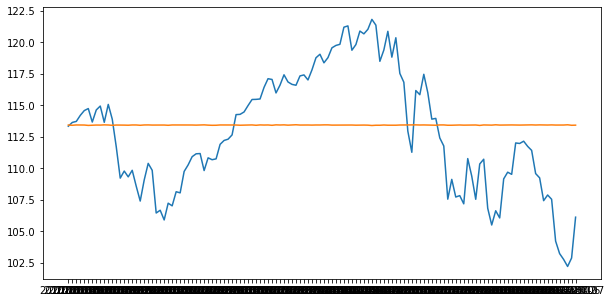

In [64]:
plt.figure(figsize=(10,5))
plt.plot(x_train[:128].index, x_train[:128],label='real')
plt.plot(x_train[:128].index, decoded[1].flatten().tolist(),label='decoded')